In [26]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
from scipy.stats import skew
from scipy.stats import kurtosis
import pandas as pd

In [27]:
data = pd.read_csv("/content/WineQT.csv")
data.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
data.columns


Index(['Id', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [29]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1143 non-null   int64  
 1   fixed acidity         1143 non-null   float64
 2   volatile acidity      1143 non-null   float64
 3   citric acid           1143 non-null   float64
 4   residual sugar        1143 non-null   float64
 5   chlorides             1143 non-null   float64
 6   free sulfur dioxide   1143 non-null   float64
 7   total sulfur dioxide  1143 non-null   float64
 8   density               1143 non-null   float64
 9   pH                    1143 non-null   float64
 10  sulphates             1143 non-null   float64
 11  alcohol               1143 non-null   float64
 12  quality               1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [30]:
data.tail()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1138,1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1142,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [31]:
data.count()

,0
Id,1143
fixed acidity,1143
volatile acidity,1143
citric acid,1143
residual sugar,1143
chlorides,1143
free sulfur dioxide,1143
total sulfur dioxide,1143
density,1143
pH,1143


In [60]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [61]:
df = data
print
(df.isnull().sum())


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [34]:
data = df.drop(['Id'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [35]:
mx = data['quality'].max()
mn = data['quality'].min()
print(f"max:{mx}\tmin:{mn}\nrange:{mx-mn}")

max:8	min:3
range:5


In [36]:
df = data
df['quality'].sum()

6466

In [37]:
df['quality'].max()

8

In [38]:
df['quality'].mean()

5.657042869641295

In [39]:
df['quality'].median()

6.0

In [40]:
df['quality'].mode()

,quality
0,5


In [41]:
df['quality'].std()

0.8058242481000952

In [42]:
st.harmonic_mean(df['quality'])

5.541050590394404

In [43]:
skew(df['quality'])

0.2864151961088048

In [44]:
kurtosis(df['quality'])

0.3080443856017929

In [45]:
st.variance(df['quality'])

0.6493527188260837

In [46]:
st.stdev(df['quality'])

0.8058242481000951

In [47]:
types = np.sort(data['quality'].unique())
types


array([3, 4, 5, 6, 7, 8])

In [48]:
correlation=data.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


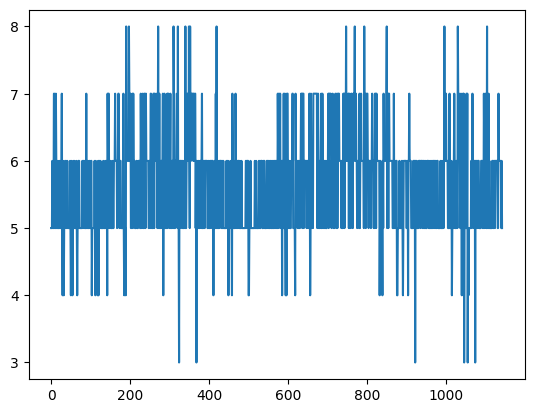

In [49]:
import matplotlib.pyplot as plt
plt.plot(df['quality'])
plt.show()


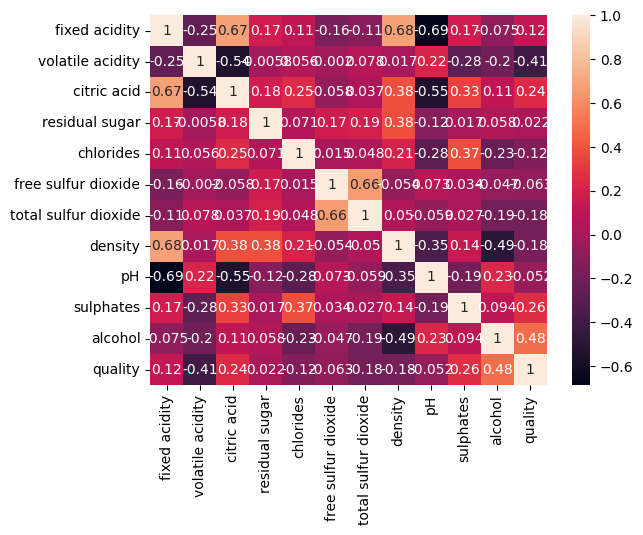

In [50]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()


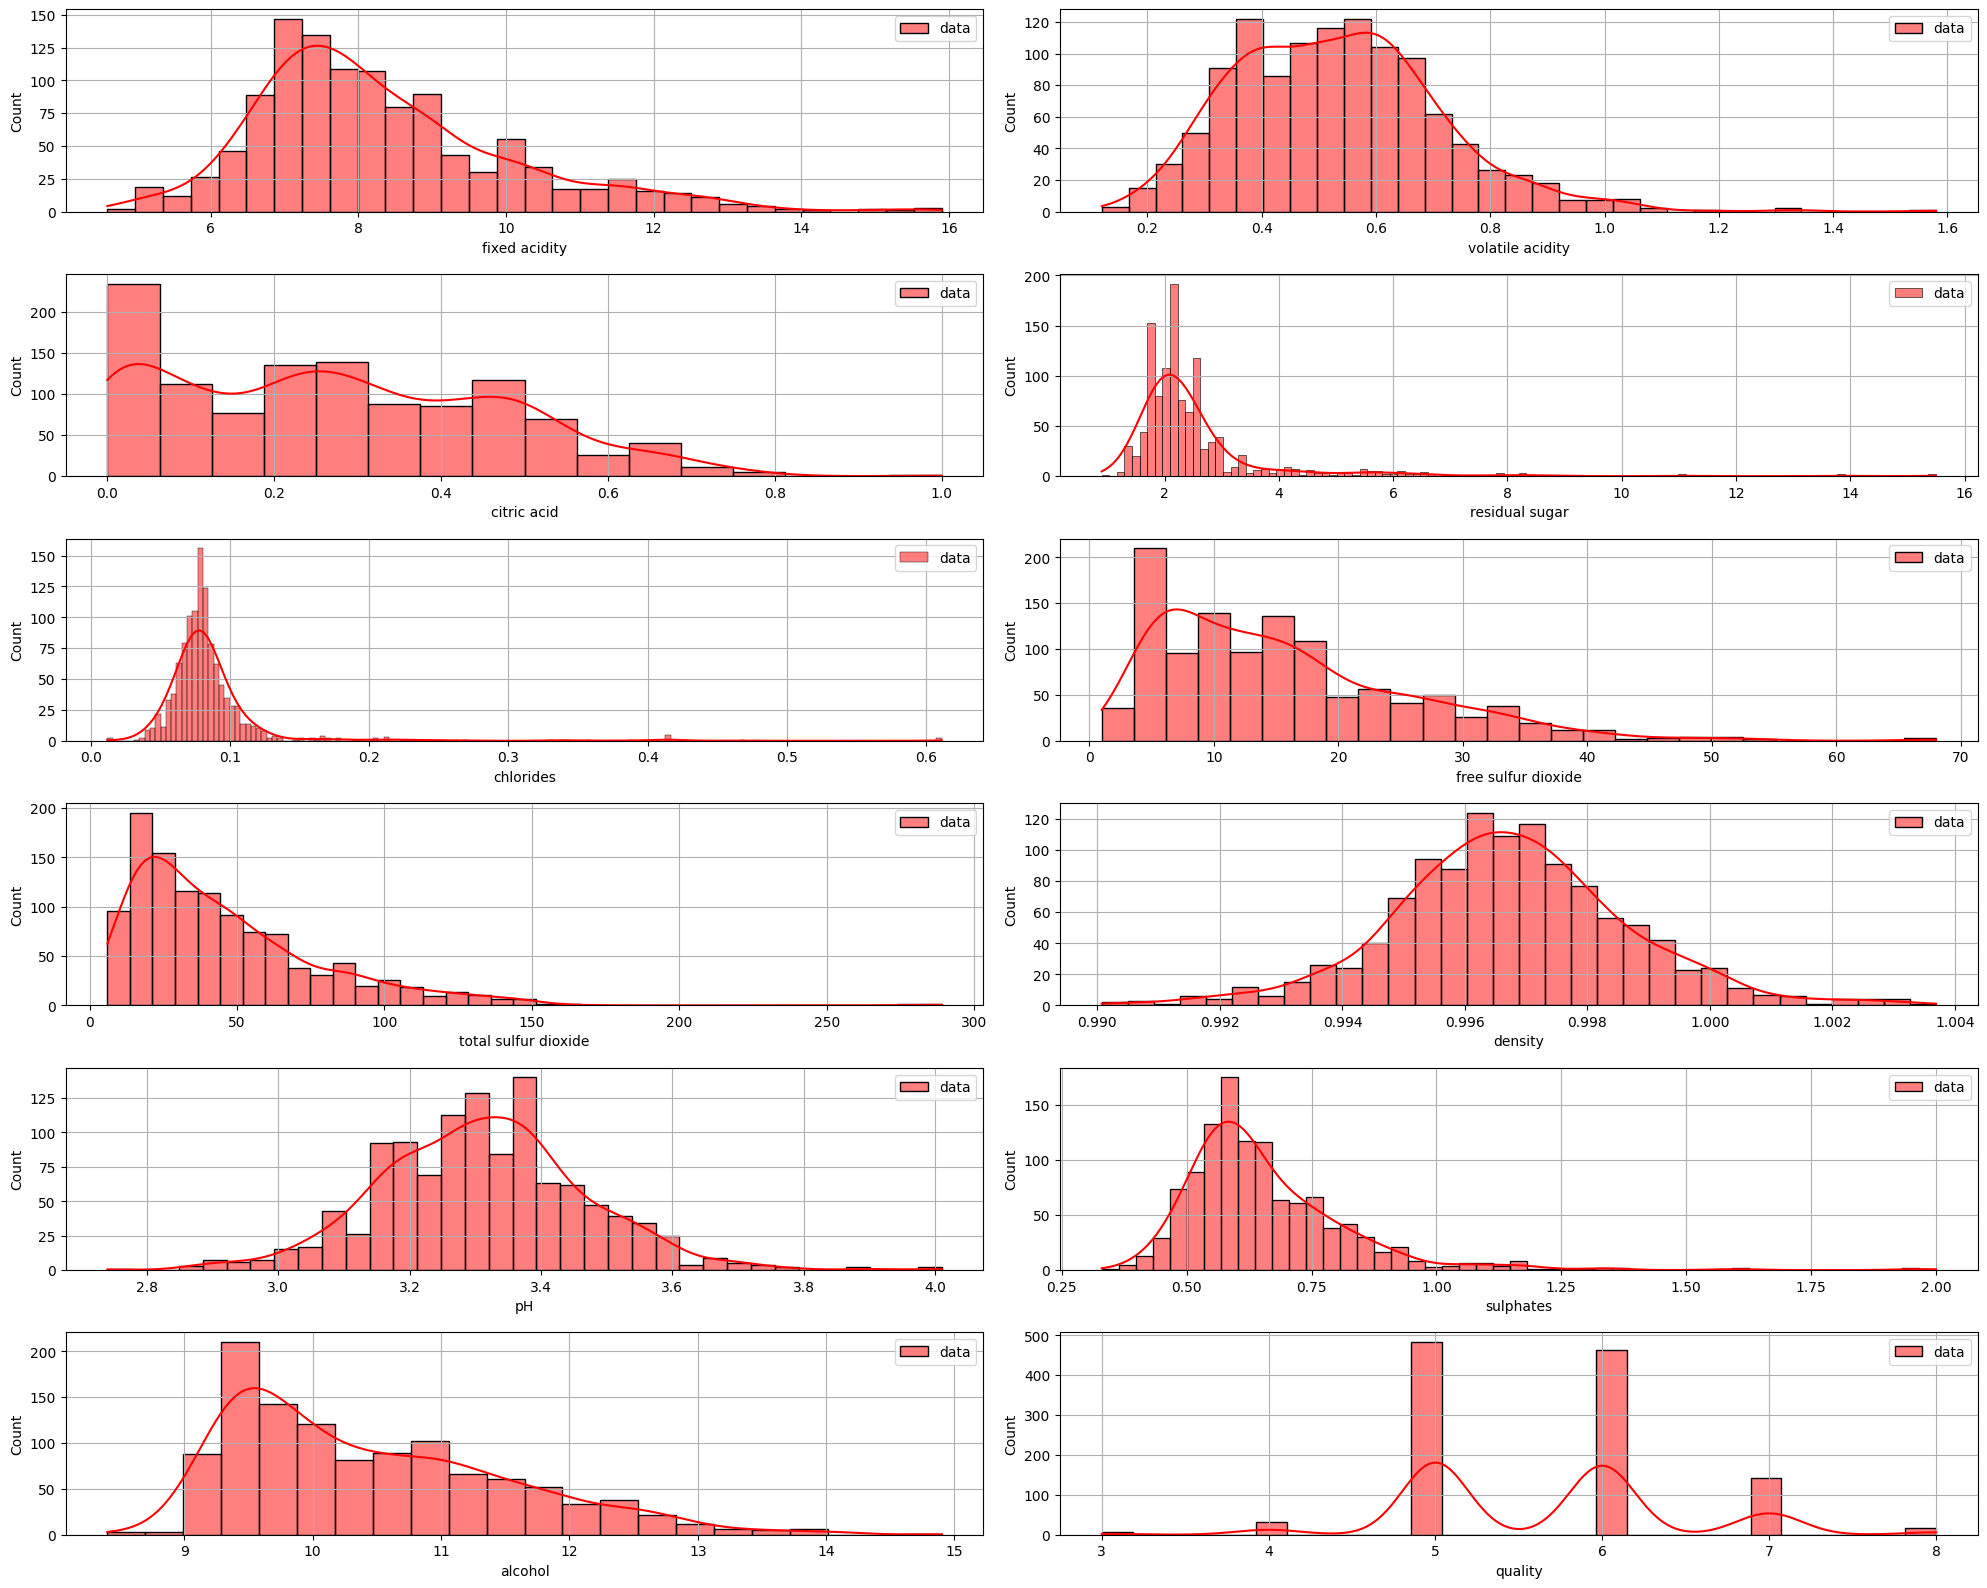

In [51]:
# Calculate the number of rows needed based on the number of columns
num_cols = len(data.columns)
cols_per_row = 2
rows = (num_cols + cols_per_row - 1) // cols_per_row # Calculate number of rows needed
plt.figure(figsize=(20, 16))
for i, col in enumerate(data.columns):
 plt.subplot(rows, cols_per_row, i + 1) # Adjust subplot grid based on the number of rows
 sns.histplot(data[col], color='r', kde=True, label='data')
 plt.grid()
 plt.legend()
plt.tight_layout()
plt.show()


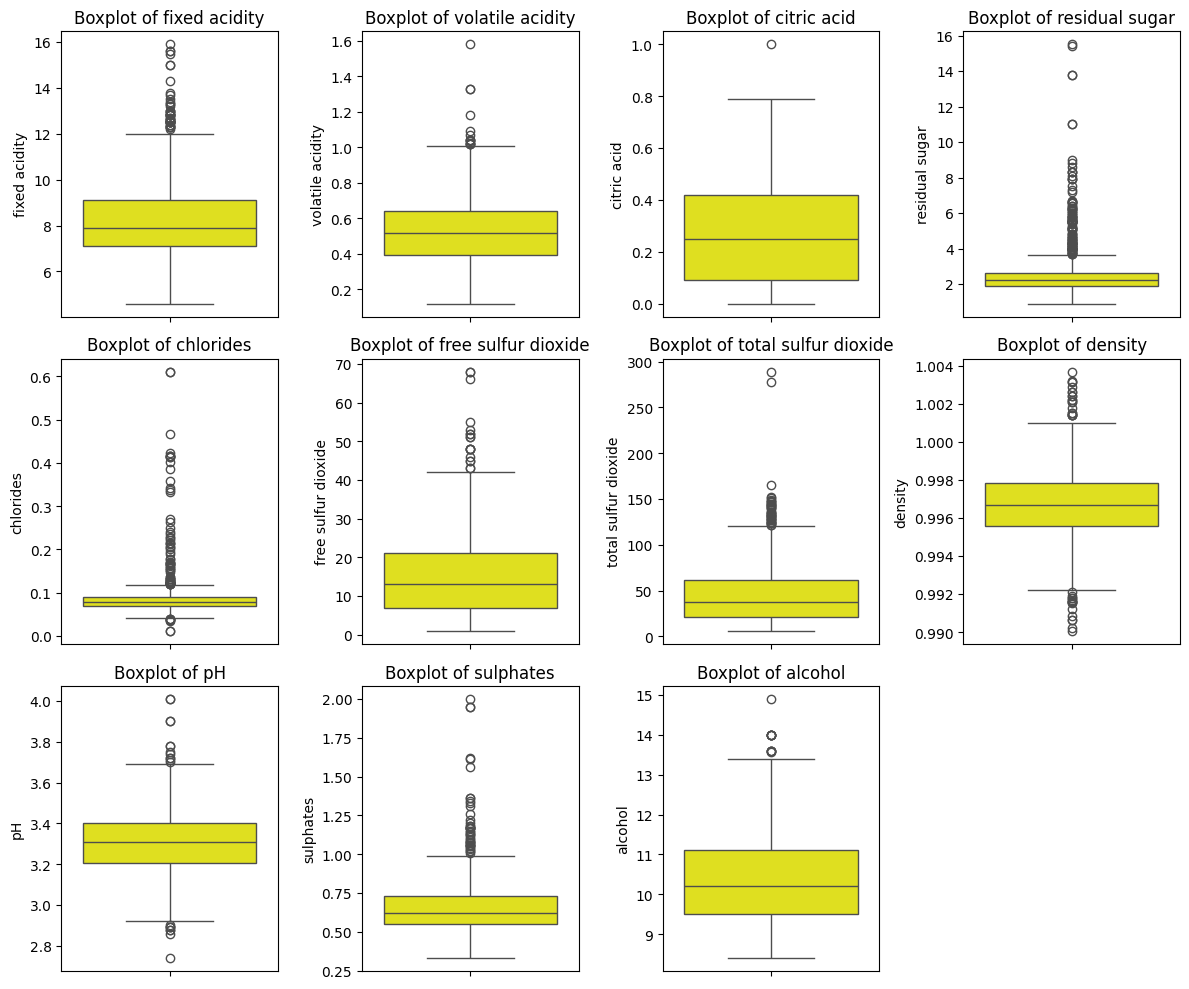

In [52]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns[:-1]): # Exclude the target column
 plt.subplot(3, 4, i+1)
 sns.boxplot(y=data[column], color='yellow')
 plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


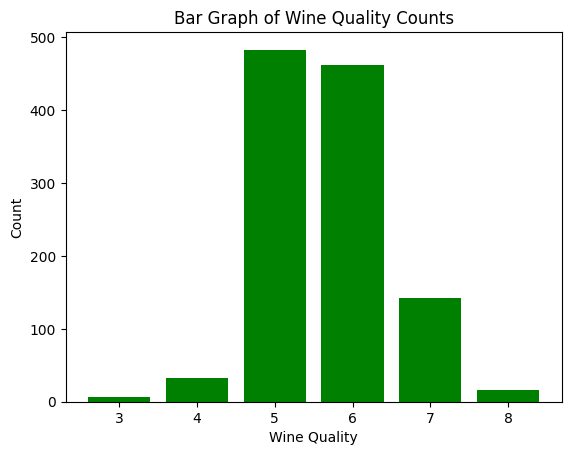

In [53]:

# Count the occurrences of each quality score
quality_counts = df['quality'].value_counts()

# Plot the bar graph
plt.bar(quality_counts.index, quality_counts.values, color="green")
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Bar Graph of Wine Quality Counts')
plt.show()


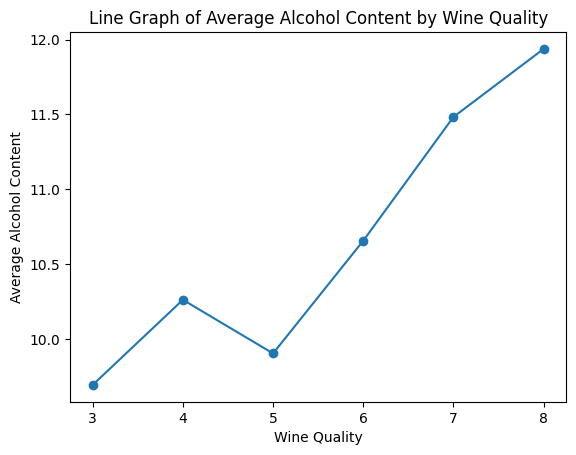

In [54]:
average_alcohol = df.groupby('quality')['alcohol'].mean()

plt.plot(average_alcohol.index, average_alcohol.values, marker='o')
plt.xlabel('Wine Quality')
plt.ylabel('Average Alcohol Content')
plt.title('Line Graph of Average Alcohol Content by Wine Quality')
plt.show()


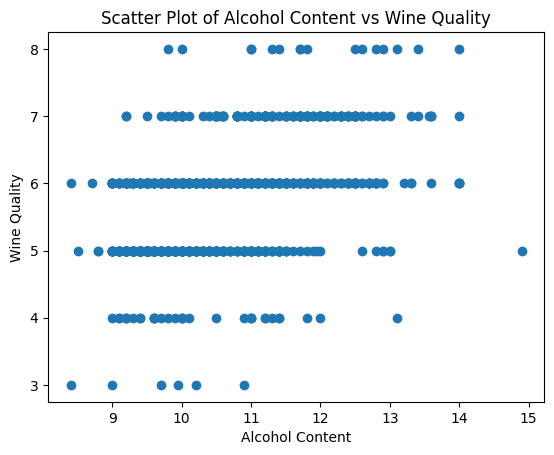

In [55]:
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.title('Scatter Plot of Alcohol Content vs Wine Quality')
plt.show()


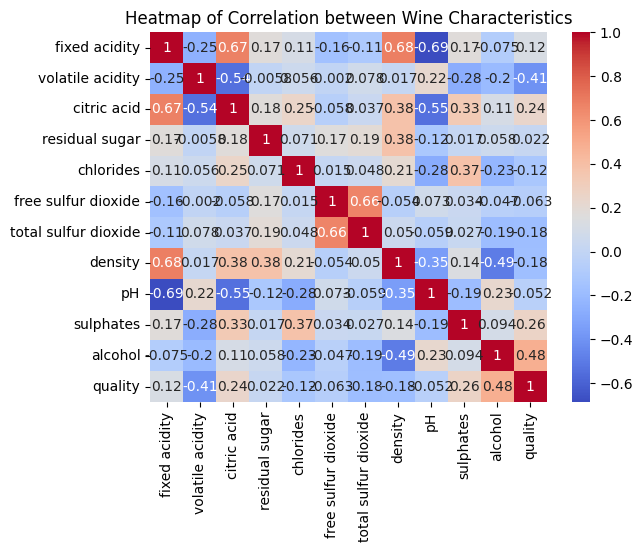

In [56]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation between Wine Characteristics')
plt.show()


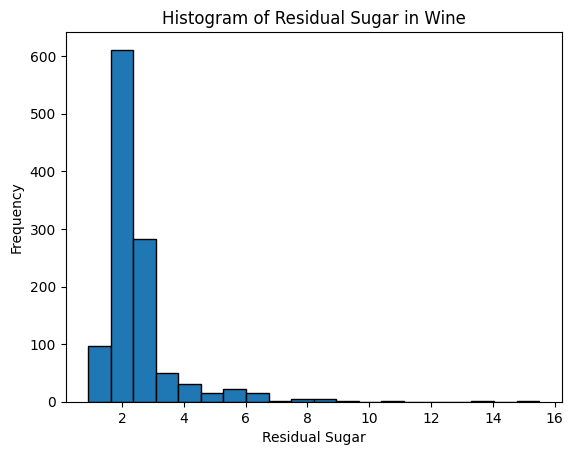

In [57]:
plt.hist(df['residual sugar'], bins=20, edgecolor='black')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.title('Histogram of Residual Sugar in Wine')
plt.show()


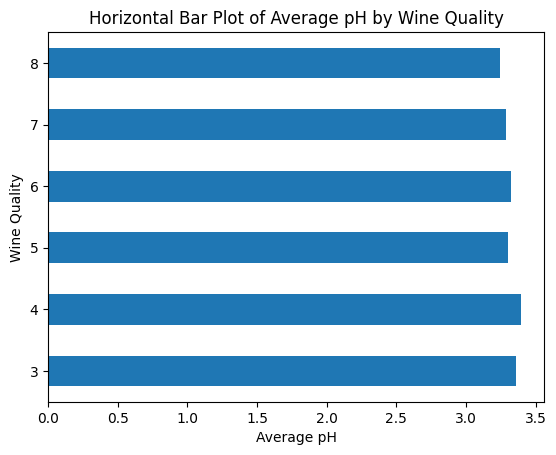

In [58]:
average_pH = df.groupby('quality')['pH'].mean()

average_pH.plot(kind='barh')
plt.xlabel('Average pH')
plt.ylabel('Wine Quality')
plt.title('Horizontal Bar Plot of Average pH by Wine Quality')
plt.show()